In [ ]:
# Required Installs : numpy nltk pandas tensorflow numpy pydot
# pip install pydot

In [2]:
# Imports 
import os
import numpy as np
import json
import pickle
import random
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt


nltk.download('punkt')
nltk.download('wordnet')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional,Embedding
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize


import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /home/anirudh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anirudh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
os.chdir('/home/anirudh/Documents/CSCE 585/ML_chatbot_csce585')
data_file = open('data/intentData/data_small.json').read()
smallData = json.loads(data_file)

smallDataDocument =np.array(tf.random.shuffle((smallData['test'])))

testDataDocument =np.array(tf.random.shuffle(smallData['train']))


In [12]:
# Removes all duplicated words
intentTypeVector = CountVectorizer(analyzer = "word", tokenizer = None,lowercase=True, preprocessor = None, stop_words = None)
intentVectorData = intentTypeVector.fit_transform(smallDataDocument[:,1])

textVector = CountVectorizer(analyzer = "word", tokenizer = None,lowercase=True, preprocessor = None, stop_words = None)
textVectorData= textVector.fit_transform(smallDataDocument[:,0])

testTextX=textVector.transform(testDataDocument[:,0]).toarray()
testTextY=intentTypeVector.transform(testDataDocument[:,1]).toarray()


# cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
# print(cv_dataframe)
    

In [19]:


# High Learning Rate 
model = Sequential()
model.add(Dense(400, input_shape=(len(trainDataX[0]),), activation='tanh'))
model.add(Dropout(0.7))
model.add(Dense(200, activation='tanh'))
model.add(Dense(len(trainDataY[0]), activation='softmax',name='layer2'))
sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()
history = model.fit(np.array(trainDataX), np.array(trainDataY), shuffle=True,epochs=100, batch_size=32, verbose=1, validation_data=(testTextX,testTextY))
model.save('model/Intent_model_lr_high.h5', history)





NameError: name 'trainDataX' is not defined

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

150


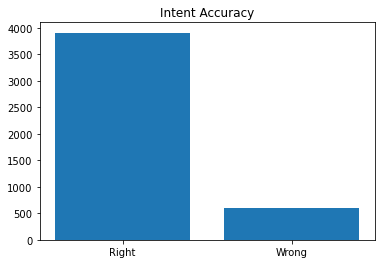

In [ ]:
model = load_model('model/chatbot_model.h5')

right = 0
wrong = 0
prediction = model.predict(testTextX)
Labels = intentTypeVector.get_feature_names()

print(len(Labels))
for i in range(len(testDataDocument)):
    pred = prediction[i].argmax()

    if Labels[pred] == testDataDocument[i,1]:
        right +=1
    else:
        wrong +=1

plt.bar(['Right','Wrong'], [right,wrong])
plt.title('Intent Accuracy')
plt.show()


# print()


# y_pred = np.array(list(intentTypeVector.vocabulary_.values()))
# y_test = np.array(list(intentTypeVector.vocabulary_.values()))

# cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(intentTypeVector.vocabulary_.keys()))

# disp.plot(cmap=plt.cm.Blues)
# plt.figure(figsize=(100,40))
# plt.show()

# predictions=model.predict(testTextX)
# ERROR_THRESHOLD = 0.9
# # results = [[i,r] for i,r in enumerate(predictions) if r>ERROR_THRESHOLD]
# # print(results[0])
# # print(smallDataDocument[results[0][0],1])
# print(predictions[0].argmax() )
# print(smallDataDocument[1011,1])


